# Experiment Setup

1. Define name of IQF experiment
1. Define path of the original(reference) dataset
1. Define path of the training script
1. DS_wrapper is the class that encapsulate a dataset
1. Define the list of modifications that will be applyed to the original dataset.

In [3]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='1'
os.chdir('yolov5')

In [26]:
import os
import random
import shutil

from iquaflow.datasets import DSModifier, DSWrapper, DSModifier_jpg
from iquaflow.experiments import ExperimentInfo, ExperimentSetup
from iquaflow.experiments.experiment_visual import ExperimentVisual
from iquaflow.experiments.task_execution import PythonScriptTaskExecution
from iquaflow.metrics import BBDetectionMetrics

from custom_iqf import DSModifierJPG, gen_dataset_partitions

In [39]:
#Define name of IQF experiment
experiment_name = "airportV2"

 * DSModifier refers to a modifier that simply does nothing - Reference training
 * DSModifier_jpg apply JPG compresion to the dataset

In [40]:
#List of modifications that will be applied to the original dataset:
ds_modifiers_list = [
    DSModifier_jpg(params={'quality': i})
    for i in [10,20, 30,50,70,90]
]

In [ ]:
# Task execution executes the training loop
task = PythonScriptTaskExecution(model_script_path = 'train.py')

# Execution

Experiment definition, pass as arguments all the components defined beforehand:

In [ ]:
for random_seed in [
    47625, 
    29884, 
    51915, 
    89294, 
    71825, 
    57277, 
    39673, 
    80043, 
    14516, 
    90692
]:
    
    ref_dsw_train, ref_dsw_val = gen_dataset_partitions(
        random_seed,
        dsdir = 'datasets/alldata',
        ratio_train_val=0.2
    )

    #Experiment definition, pass as arguments all the components defined beforehand
    experiment = ExperimentSetup(
        experiment_name   = experiment_name,
        task_instance     = task,
        ref_dsw_train     = ref_dsw_train,
        ref_dsw_val       = ref_dsw_val,
        ds_modifiers_list = ds_modifiers_list,
        repetitions=1,
        cloud_options={'tracking_uri': 'https://mlflow.ml.analytics-dev.satellogic.team/'},
        extra_train_params={"weights":[
            'yolov5n.pt',
            'yolov5s.pt'
        ]}
    )

    #Execute the experiment
    experiment.execute()

# Pick-up results / metrics and plot

 * Define name of IQF experiment
 * Define path of the original(reference) dataset

In [4]:
#Define name of IQF experiment
experiment_name = "airport"

## Load experiment info
 - ExperimentInfo is used to retrieve all the information of the whole experiment. 
 - It contains built in operations but also it can be used to retrieve raw data for futher analysis
 - The get_df method will sort data in a dataframe suitable for the visualizations

In [5]:
experiment_info = ExperimentInfo(experiment_name)

df = experiment_info.get_df(
    ds_params=["quality",'modelSize'],
    metrics=['P', 'R', 'mAP_0.5', 'mAP_0.5_0.95'],
    dropna = True,
    fields_to_float_lst = ['P', 'R', 'mAP_0.5', 'mAP_0.5_0.95'],
    fields_to_int_lst = ['ds_quality']
)

In [6]:
df

,name,ds_quality,ds_modelSize,P,R,mAP_0.5,mAP_0.5_0.95
0,train#jpg50_modifier,50,S,0.974136,0.916649,0.964987,0.708531
1,train#jpg50_modifier_0,50,S,0.975428,0.921442,0.962092,0.707859
2,train#jpg50_modifier_1,50,S,0.975556,0.919901,0.963683,0.708527
3,train#jpg90_modifier,90,N,0.968384,0.896416,0.951973,0.670115
4,train#jpg50_modifier_2,50,S,0.972752,0.916821,0.958584,0.706375
5,train#jpg90_modifier_0,90,N,0.959255,0.903266,0.948764,0.668735
6,train#jpg50_modifier_3,50,S,0.971952,0.913432,0.958990,0.703889
7,train#jpg90_modifier_1,90,N,0.972253,0.898336,0.954132,0.669647
8,train#jpg30_modifier,30,S,0.969467,0.920826,0.958161,0.700475
9,train#jpg90_modifier_2,90,N,0.966624,0.896488,0.954160,0.669108


## Visualize
 - Plotting utilities are available in it_tool_box

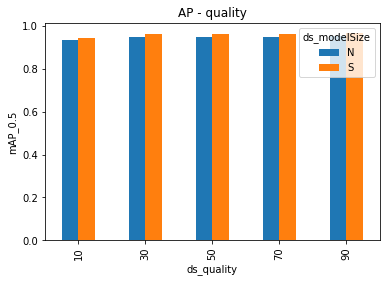

In [7]:
ev = ExperimentVisual(df)

ev.visualize(
    plot_kind="bars",
    xvar="ds_quality",
    yvar="mAP_0.5",
    legend_var="ds_modelSize",
    title="AP - quality"
)

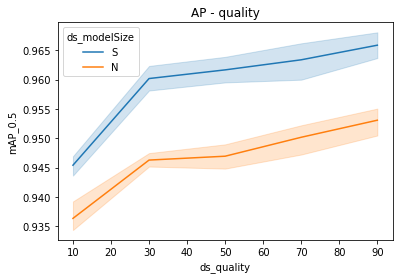

In [8]:
ev = ExperimentVisual(df)

ev.visualize(
    xvar="ds_quality",
    yvar="mAP_0.5",
    legend_var="ds_modelSize",
    title="AP - quality"
)